<a href="https://colab.research.google.com/github/vannagrimaldo/Python-Foundations/blob/main/Week4_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4.1 Sanity Checks Part 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#drive needs to get mounted.

#import the necessary libraries
import numpy as np
import pandas as pd

#import libraries for data visualitzation
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data=pd.read_csv('/content/drive/MyDrive/Melbourne_Housing.csv') # It took the one in google drive not the one here in the window we attached on the side.
data.head()#head() method is used to return top n (5 by default) rows of a data frame or series.


Mounted at /content/drive


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000


In [ ]:
data.tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
27109,Noble Park,3,h,C21,30-09-2017,22.700,3174.000,3.000,1.000,6.000,569.000,130,1959.000,South-Eastern Metropolitan,11806,627500
27110,Reservoir,3,u,RW,30-09-2017,12.000,3073.000,3.000,1.000,1.000,NaN,105,1990.000,Northern Metropolitan,21650,475000
27111,Roxburgh Park,4,h,Raine,30-09-2017,20.600,3064.000,4.000,2.000,2.000,NaN,225,1995.000,Northern Metropolitan,5833,591000
27112,Springvale South,3,h,Harcourts,30-09-2017,22.200,3172.000,3.000,2.000,1.000,544.000,NaN,NaN,South-Eastern Metropolitan,4054,780500
27113,Westmeadows,4,h,Barry,30-09-2017,16.500,3049.000,4.000,2.000,6.000,813.000,140,1960.000,Northern Metropolitan,2474,791000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


Since a lot of the data is in objects we need to convert it to the right values so we can work with them.


In [ ]:
data ['Date'] = pd.to_datetime(data['Date'])

<ipython-input-4-793a77104509>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data ['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data['BuildingArea'].unique()
data['BuildingArea'].apply(type).value_counts()
# We can see that there is mixed data in the column and we also have fillers for missing values such as 'inf' or 'missing' so those need to be adjusted accordingly.
# also some values are float and some are strings, so we need to adjust these to all be numbers.

data['BuildingArea']=data['BuildingArea'].replace(['missing','inf'],np.nan) # it spits out the NaN value for the missing ones.
#^^ since I initially didn't assign the value it wasn't working up on the next line since it had never actually updated the table and the data.

data['BuildingArea'] = data['BuildingArea'].astype(float)
#won't work unless you assign the data properly with the replaced values.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

^^ Now we see that the Building Area is a float :)

**Other things that we can glean now from the info table **
We can see that some of these columns dont have 27114 for their count, so we can safely assume that we have missing values in the data for those columns.

In [ ]:
data_new=pd.read_csv('/content/drive/MyDrive/Melbourne_Housing.csv', na_values=['missing','inf'])

In [ ]:
data_new['BuildingArea'].dtype # building area will now be all floats since we cleaned up the missing values.

dtype('float64')

##4.2 Sanity Checks Part 2

In [ ]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [ ]:
data.duplicated().sum()
# If there are any duplicated records we'll delete those


11

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(drop= True, inplace= True) # replacing th enew DF instead of creating a new one

In [ ]:
data.describe().T # the t for transpose is just so that it vies us a prettire table that's easier to see.

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.000,2.992,0.955,1.000,2.000,3.000,4.000,16.000
Distance,27102.000,11.280,6.784,0.000,6.400,10.500,14.000,48.100
Postcode,27102.000,3113.787,111.129,3000.000,3046.000,3088.000,3153.000,3978.000
Bedroom,20678.000,3.046,0.955,0.000,2.000,3.000,4.000,20.000
Bathroom,20672.000,1.592,0.701,0.000,1.000,1.000,2.000,9.000
Car,20297.000,1.716,0.994,0.000,1.000,2.000,2.000,18.000
Landsize,17873.000,560.537,1411.309,50.000,220.000,513.000,664.000,76000.000
BuildingArea,10529.000,154.512,130.584,11.000,101.000,133.000,183.000,6791.000
YearBuilt,11985.000,1966.618,36.042,1850.000,1950.000,1970.000,2000.000,2019.000
Propertycount,27103.000,7564.741,4494.028,83.000,4294.000,6567.000,10412.000,21650.000


In [ ]:
data['Postcode'].nunique()
# spits out the unique postcodes for the area

209

In [ ]:
cat_cols=['Suburb', 'Type', 'SellerG','Regionname']

for column in cat_cols:
  print(data[column].value_counts())
  print('-' * 50)


Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
--------------------------------------------------
h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victor

Insights from here:

**The top 5 sellers:**

-Nelson, Jellis, Barry, HockingStuart, Ray

**Regions with the most sold houses are:**

 -the Metropolitan Area, Southern Metropolitan, Northern Metropolitan, Western Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan.

-Houses make up for 67% of the real estate sold here.


In [ ]:
for column in cat_cols:
  print(data[column].value_counts(normalize= True))
  print('-'*50)

Reservoir        0.027
Bentleigh East   0.018
Richmond         0.016
Preston          0.015
Brunswick        0.014
                  ... 
Wandin North     0.000
Ferny Creek      0.000
Tecoma           0.000
Montrose         0.000
viewbank         0.000
Name: Suburb, Length: 345, dtype: float64
--------------------------------------------------
h   0.679
u   0.217
t   0.104
Name: Type, dtype: float64
--------------------------------------------------
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: SellerG, Length: 347, dtype: float64
--------------------------------------------------
Southern Metropolitan        0.313
Northern Metropolitan        0.288
Western Metropolitan         0.214
Eastern Metropolitan         0.120
South-Eastern Metropolitan   0.049
Northern Victoria            0.006


##4.3 Univariate Analysis


In [ ]:
sns.histplot(data=data,x='Distance', stat= 'density')
plt.show()
sns.boxplot(data=data,x='Distance')
plt.show()

# We get a right skewed distribution,
#houses over 25 km away are outliers, but we can see that there are quite a few, expected for a data set of 27000
#Some outliers could be data errors


ValueError: Could not interpret value `Distance` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# since the 60k property sizes seem dubious, we should explore to  make sure the data is accurate.

data.loc[data['Landsize']>60000]

#due to the nature of the data, its hard to tell if these are mistakes or accurate, the farther one makes sence it would be much cheaper since its 34.6 miles away from the metropolitan area.
#Due

In [ ]:
sns.displot(data=data, x= 'BuildingArea', kind= 'kde')
plt.show()
sns.boxplot(data= data, x= 'BuildingArea')
plt.show()

#the values over 400 sq meters seem kinda outta whack if it was my atual job i'd try to get the details on these houses to make sure they aren't typos, or user error,
#Especially when the majority of homes are around or under 500 square meters.

In [ ]:
sns.histplot(data=data, x= 'Price')
plt.show()
sns.boxplot(data= data, x= 'Price')
plt.show()
#values seem fine-ish

In [ ]:
sns.boxplot(data= data, x= 'Rooms')
plt.show()
 #more than  7 are the outliers in the data set.

In [ ]:
data.loc[data['Rooms']>7].shape
#without .shape it'll pull out all of em,
#with.shape it just gives you the records and columns

In [ ]:
data.loc[data['Rooms']>7, 'Type'].value_counts()


In [ ]:
sns.countplot(data=data, x = 'Regionname')
plt.xticks(rotation= 90)
plt.show

#4.4 Bivariate Analysis

<ipython-input-193-51aea3c460ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap= 'Spectral', vmin= -1, vmax=1)


<function matplotlib.pyplot.show(close=None, block=None)>

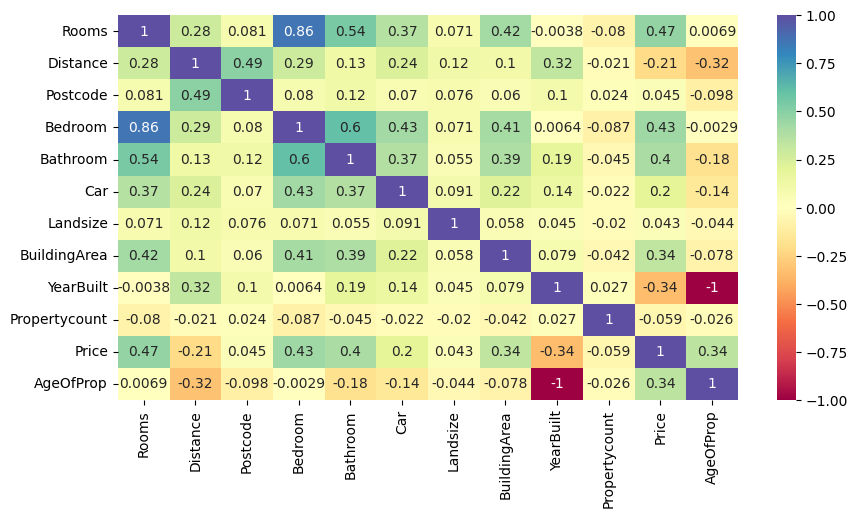

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True, cmap= 'Spectral', vmin= -1, vmax=1)
plt.show

**Observations**

*   Price and year built have a negative correlation
*   Price and distance have a negative correlation, meaning that the farther out the lower the price of the house will be.
*  The more rooms the more car spaces matter also.
*   The more rooms there are and the more bedrooms there are there is an increase or a positive correlation with the price.







In [ ]:
#Since the home price is affected by the bedroom lets do a bivariate analysis on that.
#lets create a column that combines it all together.
data['Total Space']= data['Rooms']+ data['Bedroom']+data['Bathroom']+data['Car']
data.head()



,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp,Total Space
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,0.000,9
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,116.000,5
2,Albert Park,2,h,Thomson,2016-03-09,3.300,3206.000,2,1,0,159.000,NaN,NaN,Southern Metropolitan,3280,1455000,NaN,5
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,86.000,13
4,Alphington,3,h,Jellis,2016-03-09,6.400,3078.000,3,2,2,208.000,NaN,2013.000,Northern Metropolitan,2211,1110000,3.000,10


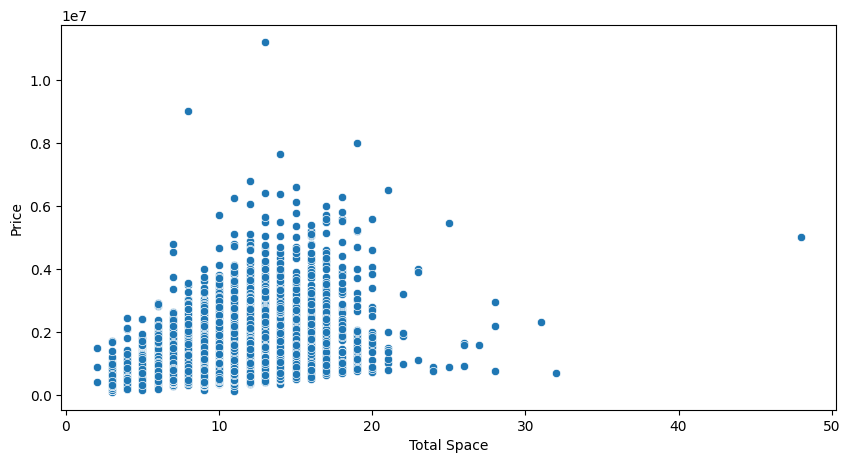

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Total Space', y ='Price')

plt.show()

There is a positive correlation, but other factors could keep a large space cheep such as location, distance from the epicenter,

In [ ]:
# if we really

<function matplotlib.pyplot.show(close=None, block=None)>

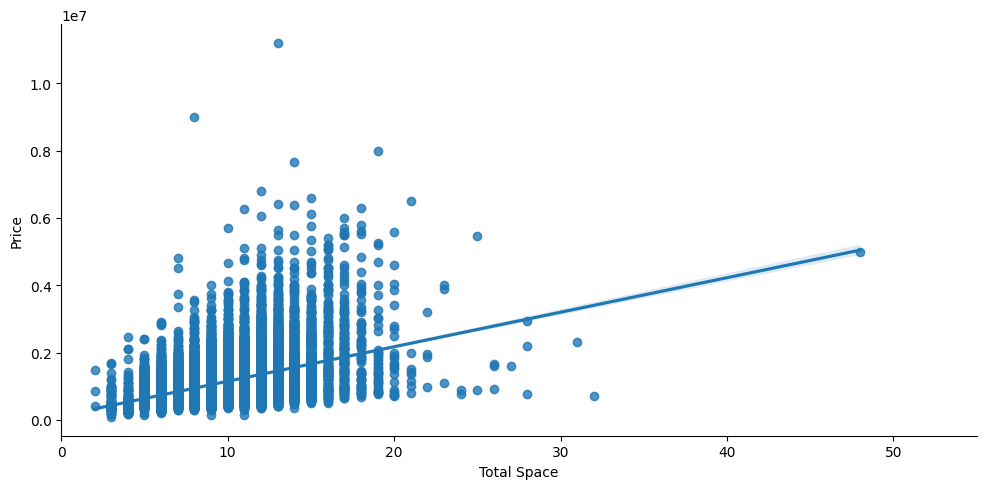

In [ ]:
sns.lmplot(data= data, x= 'Total Space',y = 'Price', height=5, aspect =2)
plt.xlim(0,55)
plt.show

In [ ]:
data[['Total Space','Price']].corr()

,Total Space,Price
Total Space,1.000,0.458
Price,0.458,1.000


from matplotlib import pyplot as plt
_df_0['Total Space'].plot(kind='hist', bins=20, title='Total Space')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Total Space', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Price']
  ys = series['Total Space']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('Total Space')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Price'}, axis=1)
              .sort_values('Price', ascending=True))
  xs = counted['Price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Total Space'].plot(kind='line', figsize=(8, 4), title='Total Space')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

there is a semi positive correlation with it. ^^

<function matplotlib.pyplot.show(close=None, block=None)>

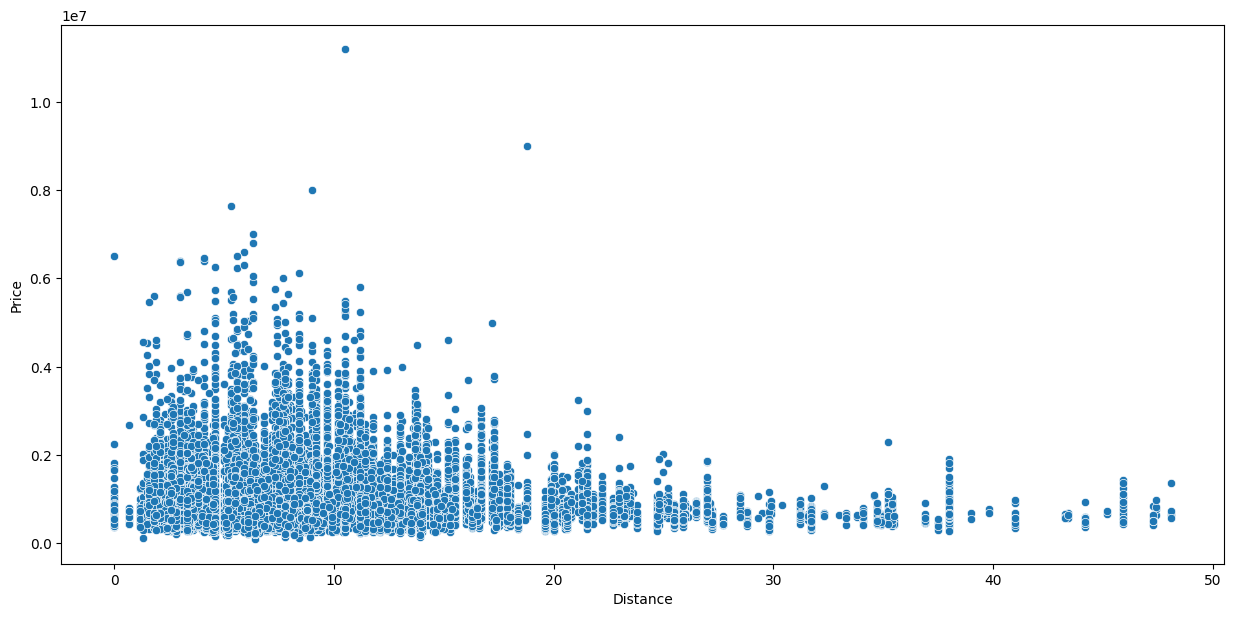

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y='Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

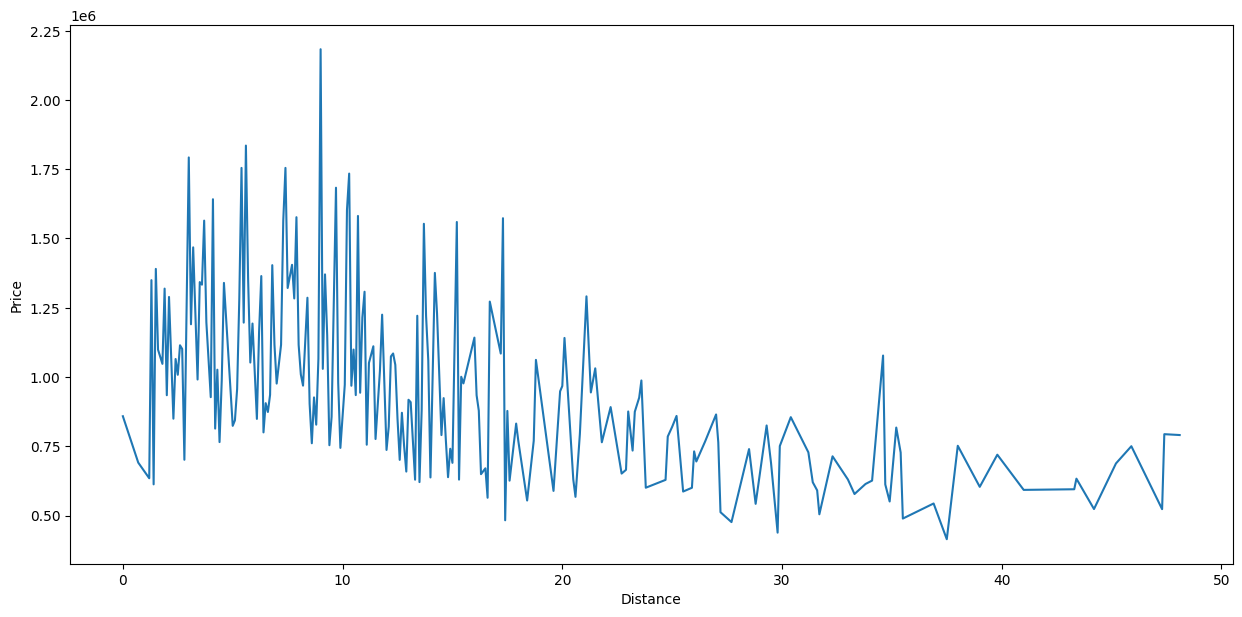

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Distance', y='Price', errorbar=None)
plt.show

In [ ]:
data['Distance_bins']= pd.cut(data['Distance'], bins=[0, 15, 30, 50], labels=['Nearby', 'Moderately Close', 'Far'], right= False)
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total Space,Distance_bins
0,Airport West,3,t,Nelson,03-09-2016,13.500,3042.000,3.000,2.000,1.000,303.000,225,2016.000,Western Metropolitan,3464,840000,9.000,Nearby
1,Albert Park,2,h,hockingstuart,03-09-2016,3.300,3206.000,2.000,1.000,0.000,120.000,82,1900.000,Southern Metropolitan,3280,1275000,5.000,Nearby
2,Albert Park,2,h,Thomson,03-09-2016,3.300,3206.000,2.000,1.000,0.000,159.000,inf,NaN,Southern Metropolitan,3280,1455000,5.000,Nearby
3,Alphington,4,h,Brace,03-09-2016,6.400,3078.000,3.000,2.000,4.000,853.000,263,1930.000,Northern Metropolitan,2211,2000000,13.000,Nearby
4,Alphington,3,h,Jellis,03-09-2016,6.400,3078.000,3.000,2.000,2.000,208.000,inf,2013.000,Northern Metropolitan,2211,1110000,10.000,Nearby


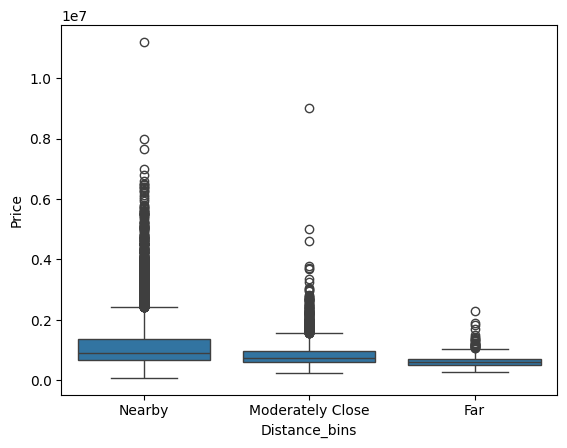

In [ ]:
sns.boxplot(data= data, x ='Distance_bins', y= 'Price')
plt.show()

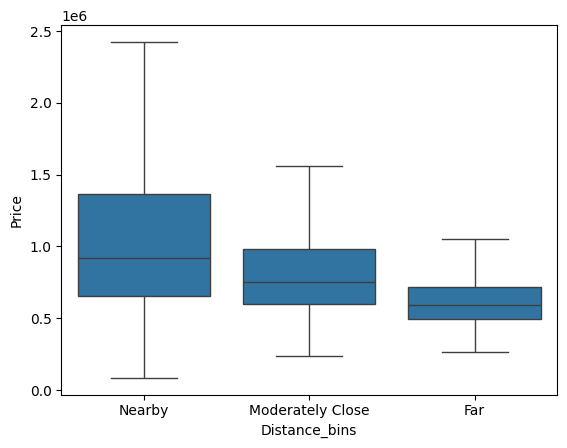

In [ ]:
sns.boxplot(data= data, x ='Distance_bins', y= 'Price', showfliers=False)
plt.show()

#4.5 Bivariate analysis part 2

In [ ]:
year_at_sale= data['Date'].dt.year
year_at_sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int64

In [ ]:
#figure out the age of the property by subracting year built from year sold
data['AgeOfProp']= year_at_sale-data['YearBuilt']
data.head()

np.max(year_at_sale)

2018

In [ ]:
data[data['AgeOfProp']==-2]



,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp
21326,Brighton East,2,h,Buxton,2016-09-24,10.700,3187.000,4.000,3.000,2.000,302.000,250.000,2018.000,Southern Metropolitan,6938,1310000,-2.000


In [ ]:
data[data['AgeOfProp']==-1]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp
285,Avondale Heights,3,t,Nelson,2016-03-12,10.500,3034.000,3.000,3.000,1.000,557.000,181.000,2017.000,Western Metropolitan,4502,851000,-1.000
13854,Bentleigh,3,h,Woodards,2018-03-17,11.400,3204.000,3.000,1.000,4.000,635.000,242.000,2019.000,Southern Metropolitan,6795,1100000,-1.000
15232,Reservoir,4,h,Barry,2016-09-17,11.200,3073.000,3.000,2.000,2.000,834.000,129.000,2017.000,Northern Metropolitan,21650,767500,-1.000
19463,Keilor East,3,h,Nelson,2016-04-23,12.800,3033.000,3.000,2.000,1.000,630.000,126.000,2017.000,Western Metropolitan,5629,825000,-1.000
24897,Newport,3,h,Jas,2016-05-28,8.400,3015.000,4.000,2.000,1.000,487.000,190.000,2017.000,Western Metropolitan,5498,945000,-1.000
27069,Heidelberg,3,h,Miles,2016-07-30,10.600,3084.000,5.000,3.000,2.000,649.000,357.000,2017.000,Eastern Metropolitan,2890,1030000,-1.000


<ipython-input-142-3b0cfd2303cd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='AgeOfProp', y='Price' , ci=None)


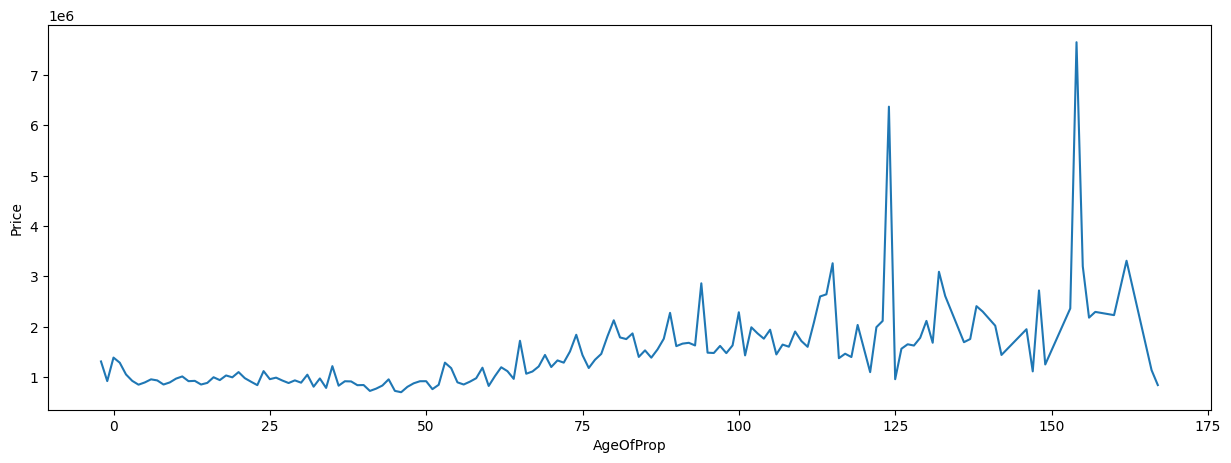

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='AgeOfProp', y='Price' , ci=None)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

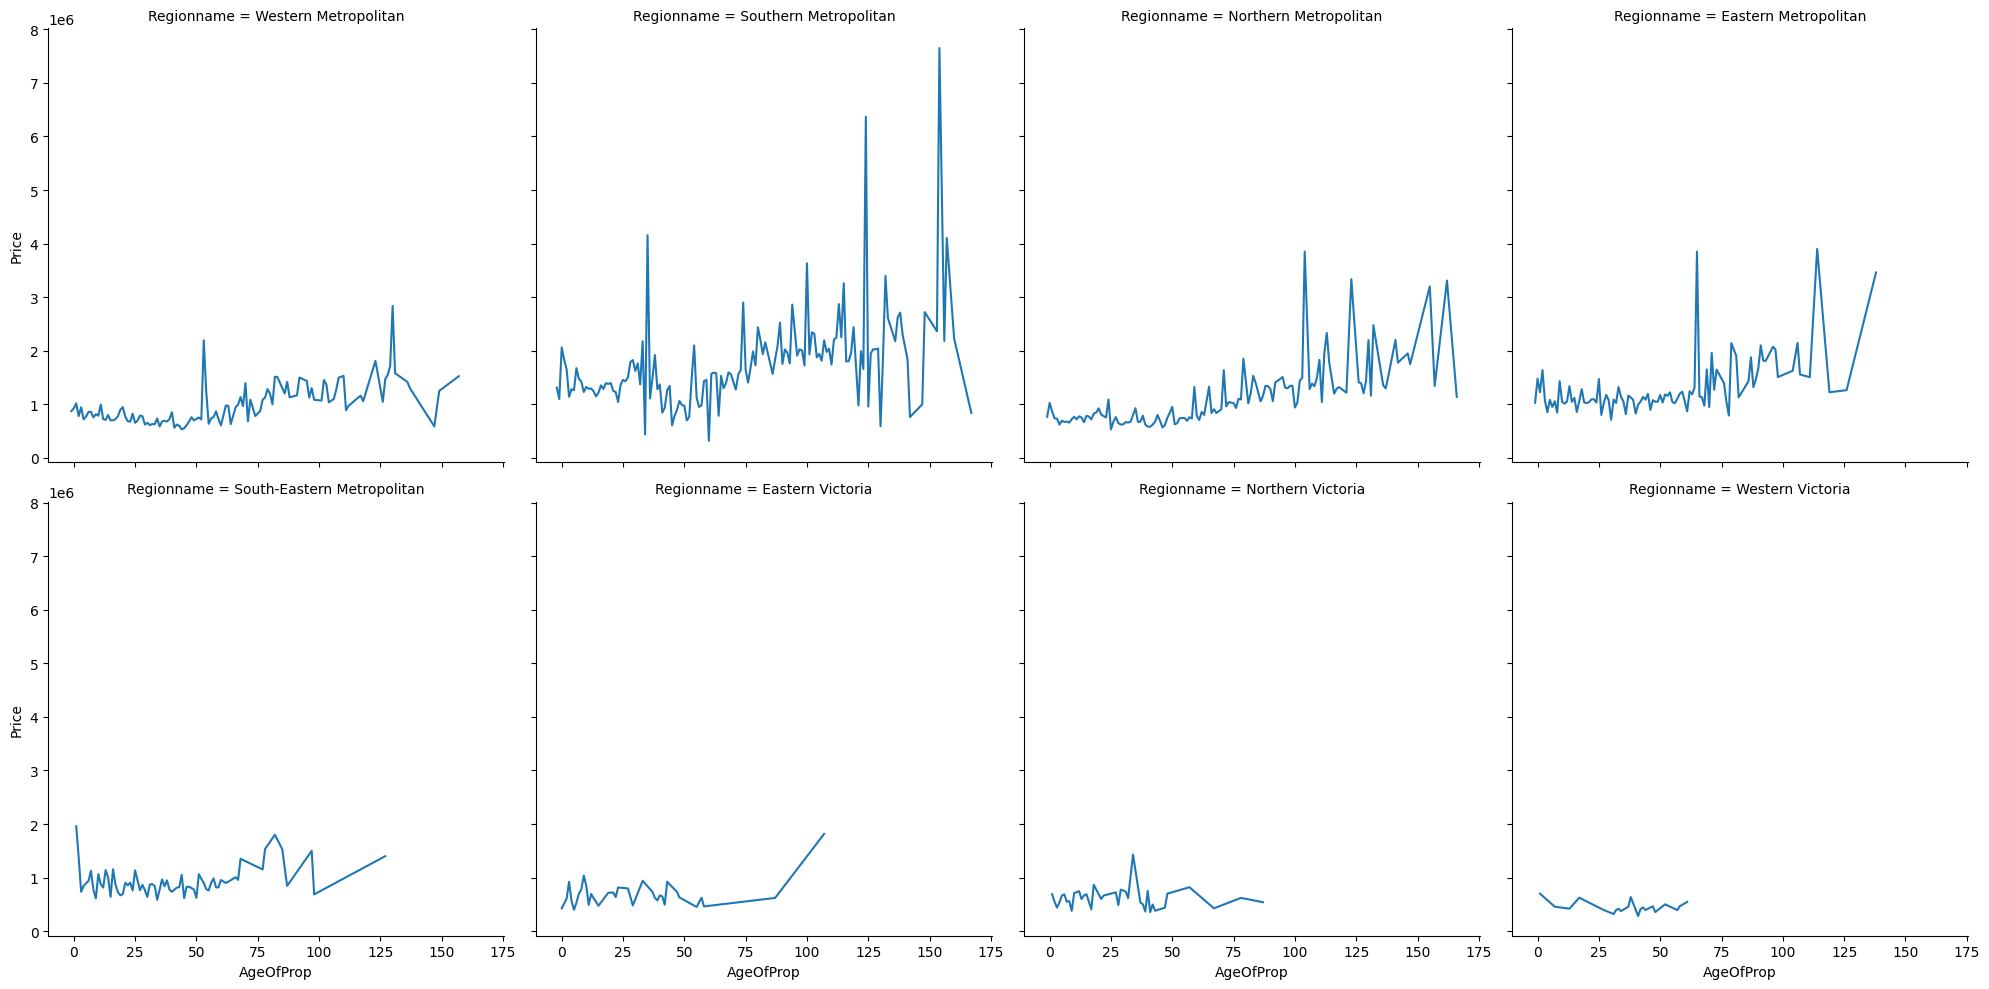

In [ ]:
sns.relplot(data=data, x='AgeOfProp', y = 'Price', col= 'Regionname', kind='line', errorbar=None, col_wrap=4)
plt.show

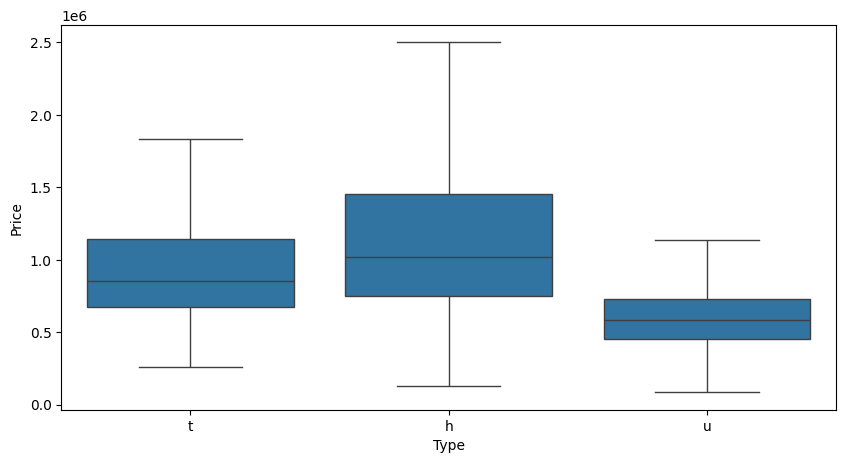

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data= data, x ='Type', y= 'Price', showfliers=False)
plt.show()

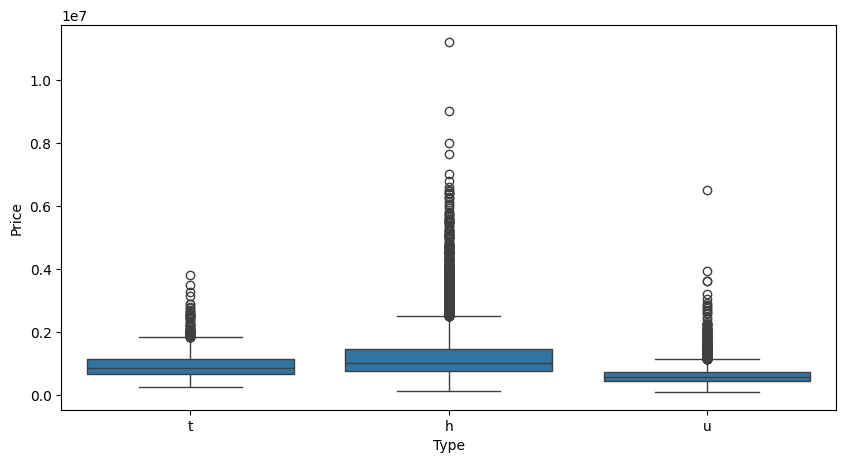

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data= data, x ='Type', y= 'Price')
plt.show()

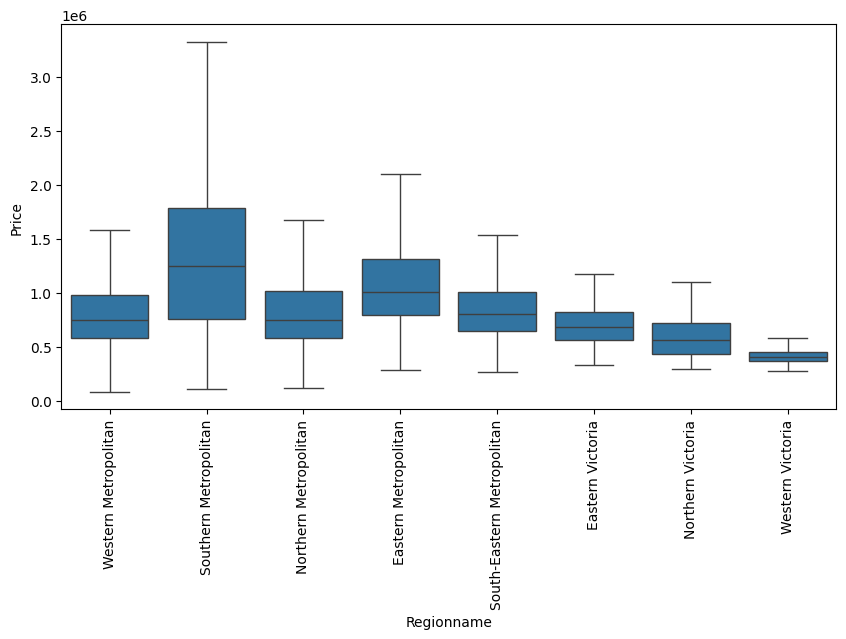

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data= data, x ='Regionname', y= 'Price', showfliers=False)
plt.xticks(rotation=90)
plt.show()

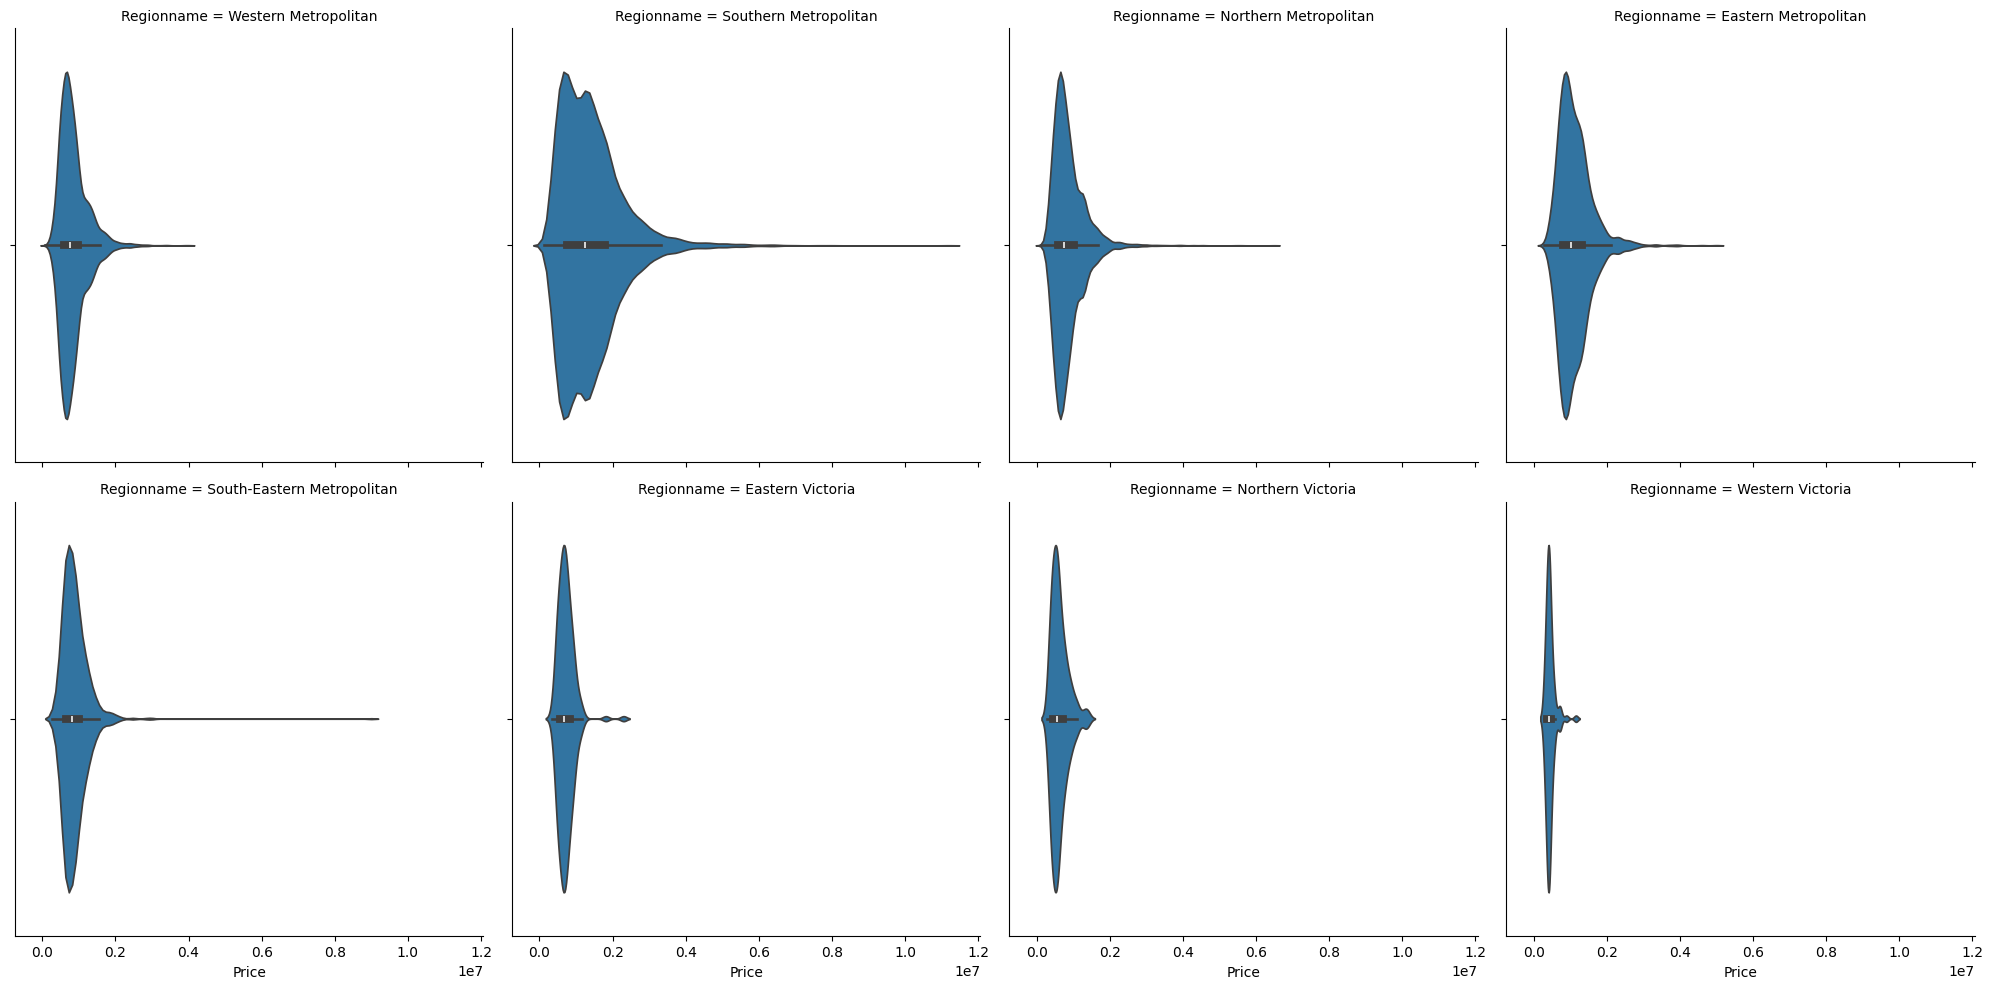

In [ ]:
sns.catplot(x='Price', col='Regionname', data=data, col_wrap=4,kind='violin')
plt.show()

#4.6 Missing Value Treatment Part 1



In [ ]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Distance,1,0.004
Postcode,1,0.004
Bedroom,6425,23.706
Bathroom,6431,23.728
Car,6806,25.112
Landsize,9230,34.055
BuildingArea,16574,61.152
YearBuilt,15118,55.780
AgeOfProp,15118,55.780


In [ ]:
# extracting all the information of other variables where Distance is null
data.loc[data['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN


In [ ]:
data.loc[data['Suburb']=='Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN


In [ ]:
# adding the index value of the row in data.drop() function
data = data.drop(9590).reset_index(drop=True)

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.704
Bathroom,6430,23.726
Car,6805,25.110
Landsize,9228,34.050
BuildingArea,16572,61.149
YearBuilt,15116,55.777
AgeOfProp,15116,55.777


In [ ]:
# extracting all the information of other variable where Bedroom is null
data.loc[data['Bedroom'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp


In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

Series([], Name: Bathroom, dtype: int64)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

Series([], Name: Car, dtype: int64)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

Series([], Name: Landsize, dtype: int64)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

Series([], Name: BuildingArea, dtype: int64)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

Series([], Name: Suburb, dtype: int64)

#4.7 Missing Value Treatment Part 2

In [ ]:
# to find the total number of unique values in a suburb
data['Suburb'].nunique()

344

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)


Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: Regionname, dtype: int64

In [ ]:
# checking the average number of bedrooms, bathrooms, and car parking spaces in a region
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

Bedroom  Bathroom   Car
Regionname                 Type                         
Eastern Metropolitan       h       3.552     1.807 1.946
                           t       3.032     1.853 1.673
                           u       2.357     1.263 1.290
Eastern Victoria           h       3.560     1.881 2.098
                           u       2.667     1.000 1.333
Northern Metropolitan      h       3.106     1.468 1.685
                           t       2.567     1.620 1.362
                           u       1.878     1.160 1.093
Northern Victoria          h       3.496     1.892 2.146
                           u       3.000     2.000 2.000
South-Eastern Metropolitan h       3.476     1.713 2.094
                           t       2.887     1.849 1.679
                           u       2.260     1.205 1.342
Southern Metropolitan      h       3.383     1.840 1.883
                           t       3.024     2.012 1.780
                           u       1.939     1.191 1.135
Western Metropolitan       h       3.244     1.576 1.907
                           t       2.880     1.851 1.538
                           u       2.106     1.192 1.144
Western Victoria           h       3.379     1.448 2.060

In [ ]:
# imputing missing values in Bedroom column
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [ ]:
# imputing missing values in Bathroom column
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [ ]:
 #imputing missing values in Car column
data['Car'] = data['Car'].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [ ]:
# checking if all the missing values were imputed in Bedroom, Bathroom, and Car columns
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
Landsize,9228,34.050
BuildingArea,16572,61.149
YearBuilt,15116,55.777
AgeOfProp,15116,55.777


In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [ ]:
# removing Total Space column
data.drop('Total Space',axis=1,inplace=True)

# creating new Total Space column
data['Total_Space_New'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

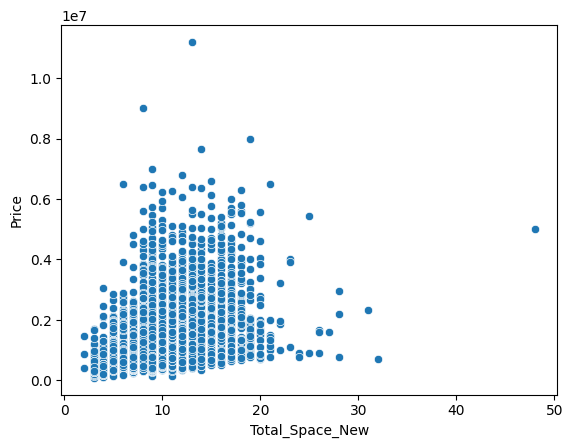

In [ ]:
sns.scatterplot(data=data,x='Total_Space_New',y='Price')
plt.show()

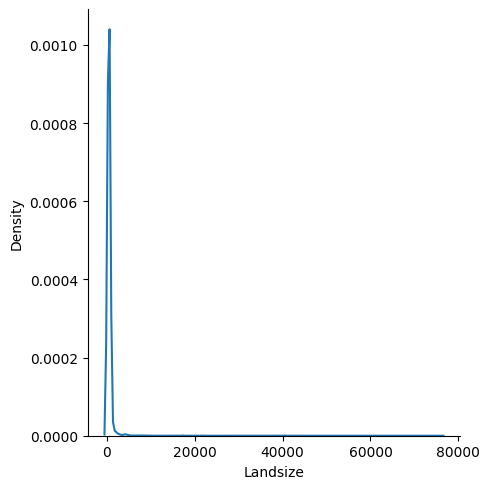

In [ ]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()

In [ ]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

Landsize
Regionname                 Type          
Eastern Metropolitan       h      693.500
                           t      236.000
                           u      208.000
Eastern Victoria           h      840.000
                           u      230.000
Northern Metropolitan      h      482.000
                           t      145.000
                           u       50.000
Northern Victoria          h      737.500
                           u      315.000
South-Eastern Metropolitan h      632.000
                           t      248.000
                           u      210.000
Southern Metropolitan      h      593.000
                           t      267.000
                           u       50.000
Western Metropolitan       h      537.000
                           t      200.000
                           u       80.000
Western Victoria           h      603.000

In [ ]:
#grouping data on region and type of property
# finding the median of landsize for each group and imputing the missing data with it
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [ ]:
# checking if all the missing values were imputed in Landsize column
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
BuildingArea,16572,61.149
YearBuilt,15116,55.777
AgeOfProp,15116,55.777


In [ ]:
# Taking option 1 to remove the 61% null values from the building area column
new_data = data[data['BuildingArea'].notnull()]
new_data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,AgeOfProp,Total_Space_New
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3,2,1,303.000,225.000,2016.000,Western Metropolitan,3464,840000,0.000,9
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2,1,0,120.000,82.000,1900.000,Southern Metropolitan,3280,1275000,116.000,5
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3,2,4,853.000,263.000,1930.000,Northern Metropolitan,2211,2000000,86.000,13
5,Altona,3,h,Greg,2016-03-09,13.800,3018.000,3,2,1,352.000,242.000,2015.000,Western Metropolitan,5301,520000,1.000,9
6,Altona North,5,h,FN,2016-03-09,11.100,3025.000,5,3,6,592.000,251.000,1965.000,Western Metropolitan,5132,1085000,51.000,19


In [ ]:
# Option 2 -  dropping columns BuildingArea, YearBuilt, and AgeofProp from the data frame
data = data.drop(['BuildingArea','YearBuilt','AgeOfProp'],axis=1)

In [ ]:
# saving the dataset with all the missing values treated
data.to_csv('/content/drive/MyDrive/Melbourne_Housing_NoMissing.csv',index=False)

#4.8 Outlier Detection and Treatment

* An outlier is a data point that are abnormally/unrealistically distant from other points in the data.

* The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting data points.

* It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Domain Knowledge and impact of the business problem tend to drive this decision.

**Handling outliers**

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

So, it is often a good idea to examine the results by  running an analysis with and without outliers.

In [ ]:
# reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Melbourne_Housing_NoMissing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Total_Space_New
0,Airport West,3,t,Nelson,2016-03-09,13.500,3042.000,3,2,1,303.000,Western Metropolitan,3464,840000,9
1,Albert Park,2,h,hockingstuart,2016-03-09,3.300,3206.000,2,1,0,120.000,Southern Metropolitan,3280,1275000,5
2,Albert Park,2,h,Thomson,2016-03-09,3.300,3206.000,2,1,0,159.000,Southern Metropolitan,3280,1455000,5
3,Alphington,4,h,Brace,2016-03-09,6.400,3078.000,3,2,4,853.000,Northern Metropolitan,2211,2000000,13
4,Alphington,3,h,Jellis,2016-03-09,6.400,3078.000,3,2,2,208.000,Northern Metropolitan,2211,1110000,10


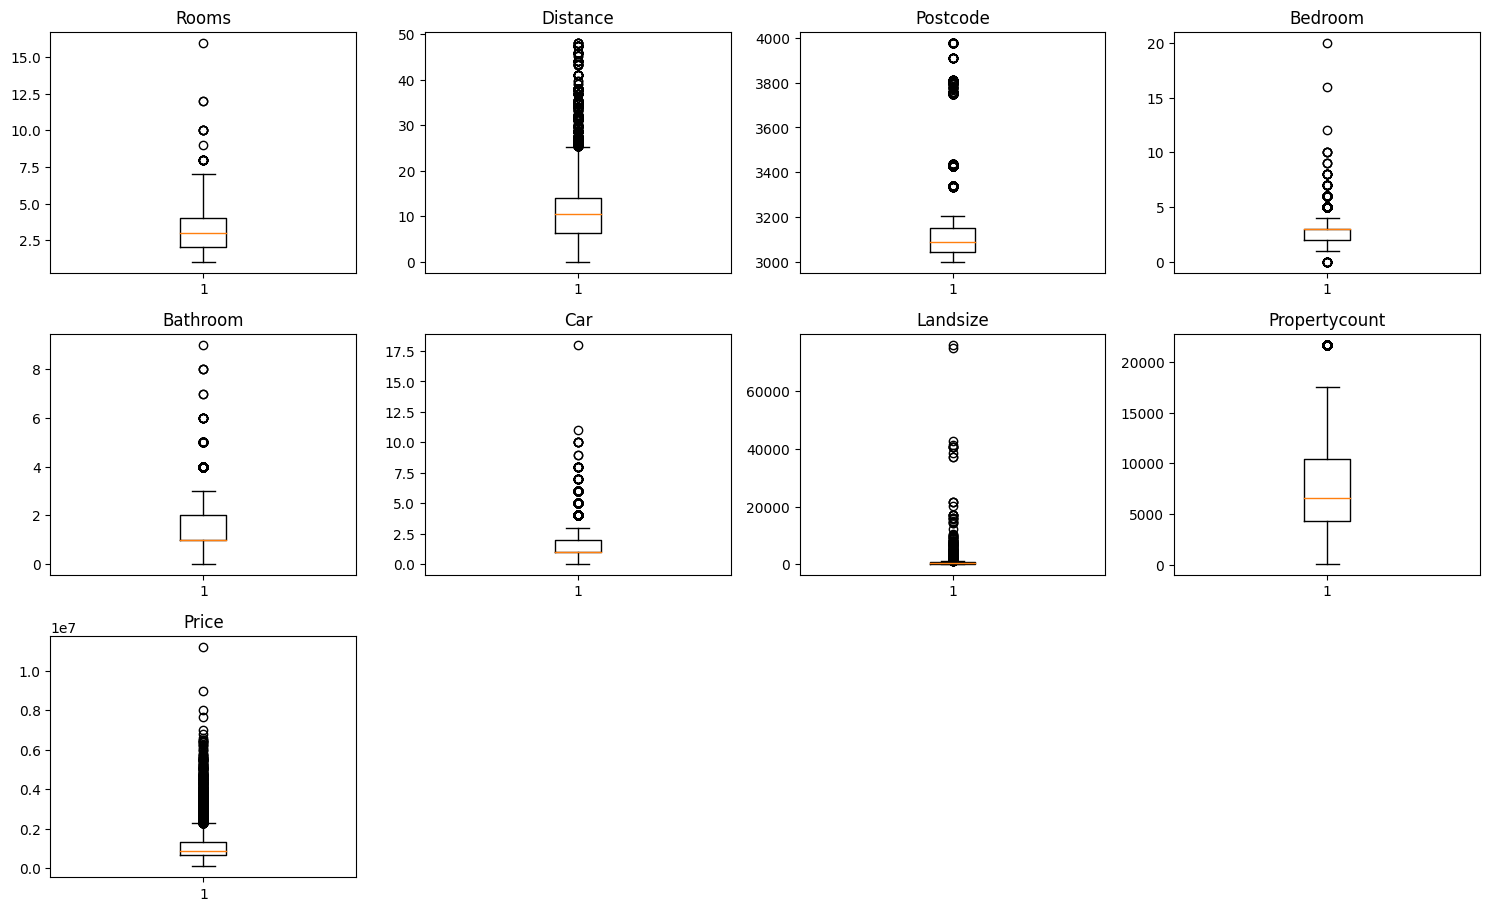

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car','Landsize',
                   'Propertycount', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100


Rooms      0.085
Bedroom    4.195
Bathroom   0.871
Car        4.306
Landsize   1.742
dtype: float64

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

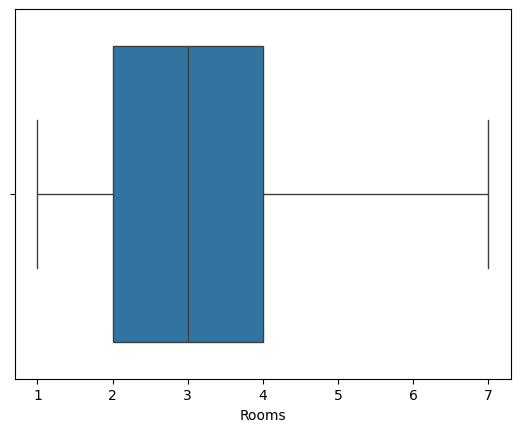

In [ ]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

In [ ]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

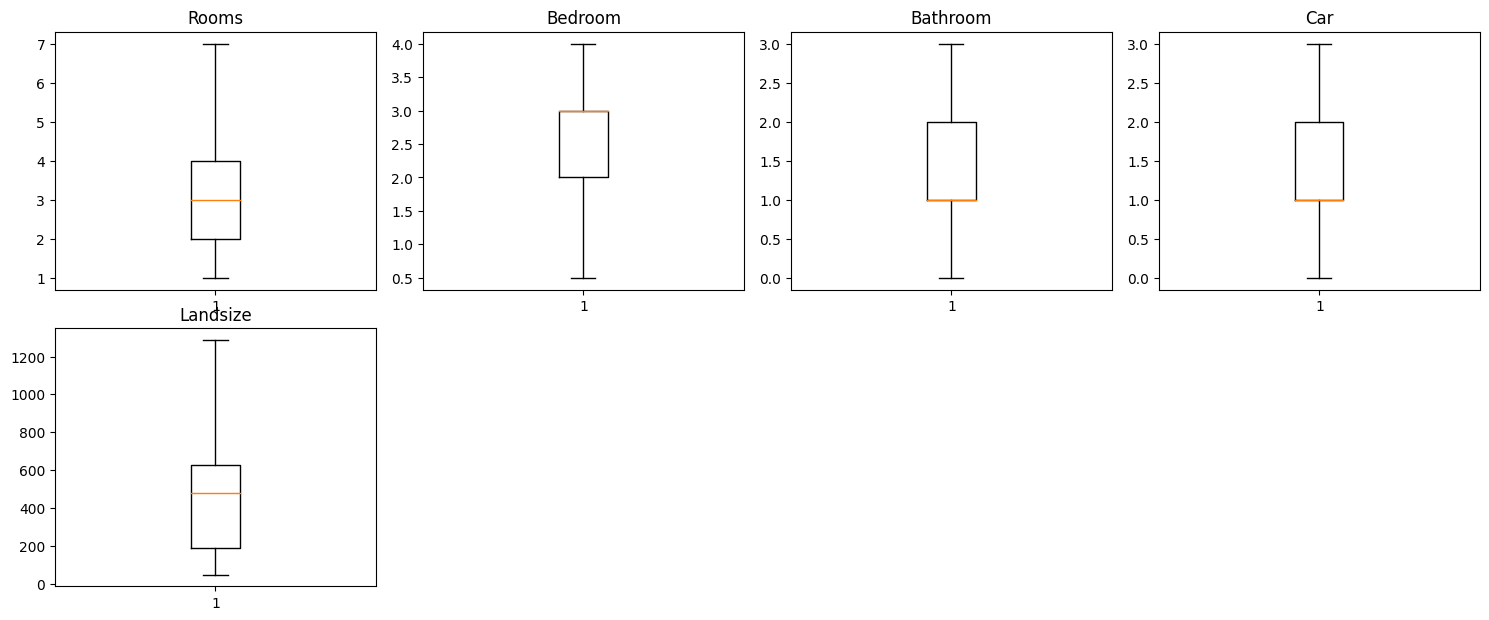

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car','Landsize']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [ ]:
# saving the dataset with all the outlier values treated
data.to_csv('/content/drive/MyDrive/Melbourne_Housing_NoOutliers.csv',index=False)

# quiz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#drive needs to get mounted.

#import the necessary libraries
import numpy as np
import pandas as pd

#import libraries for data visualitzation
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to actually display the graphs
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data=pd.read_csv('/content/drive/MyDrive/Titanic.csv') # It took the one in google drive not the one here in the window we attached on the side.
data#head() method is used to return top n (5 by default) rows of a data frame or series.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data['Age'].mean()
data['Fare'].min()
data['Fare'].max()
data['Fare'].median()

14.4542

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.drop('Cabin', axis=1, inplace=True)


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

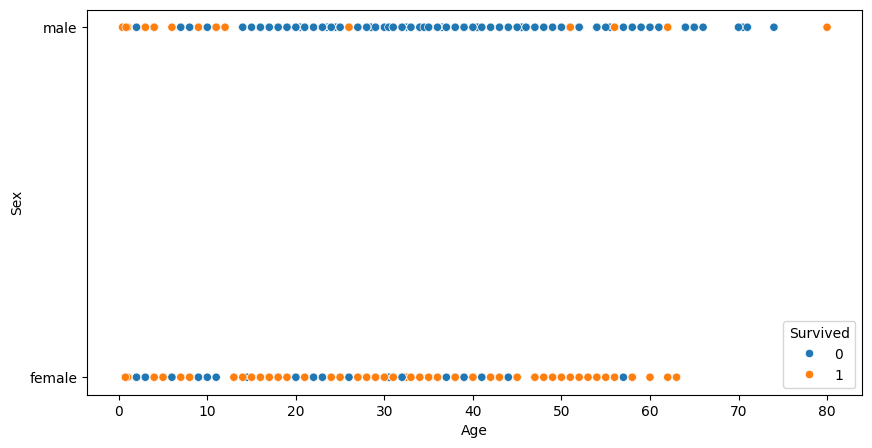

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='Age', y ='Sex', hue='Survived')
plt.show()

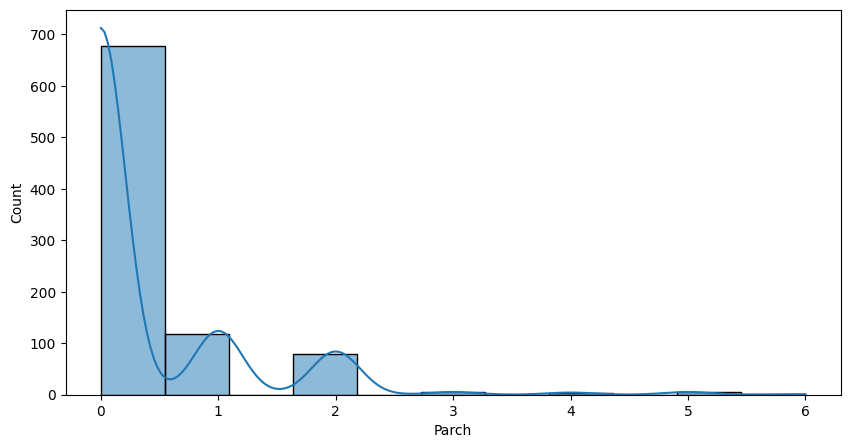

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Parch', kde=True)
plt.show()

In [ ]:

survivors_by_class = data.groupby('Pclass')['Survived'].sum()
print(survivors_by_class)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


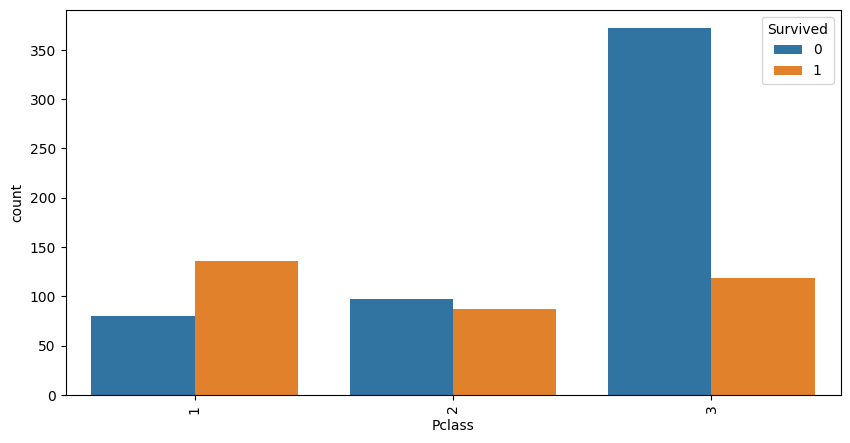

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.xticks(rotation=90)
plt.show()

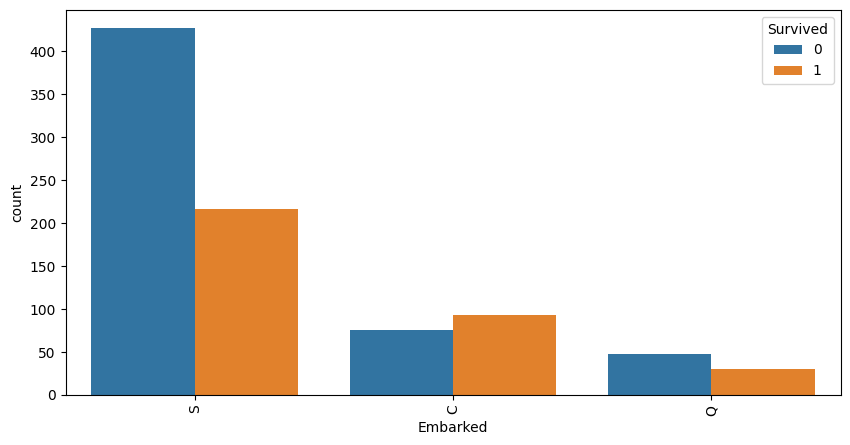

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.xticks(rotation=90)
plt.show()

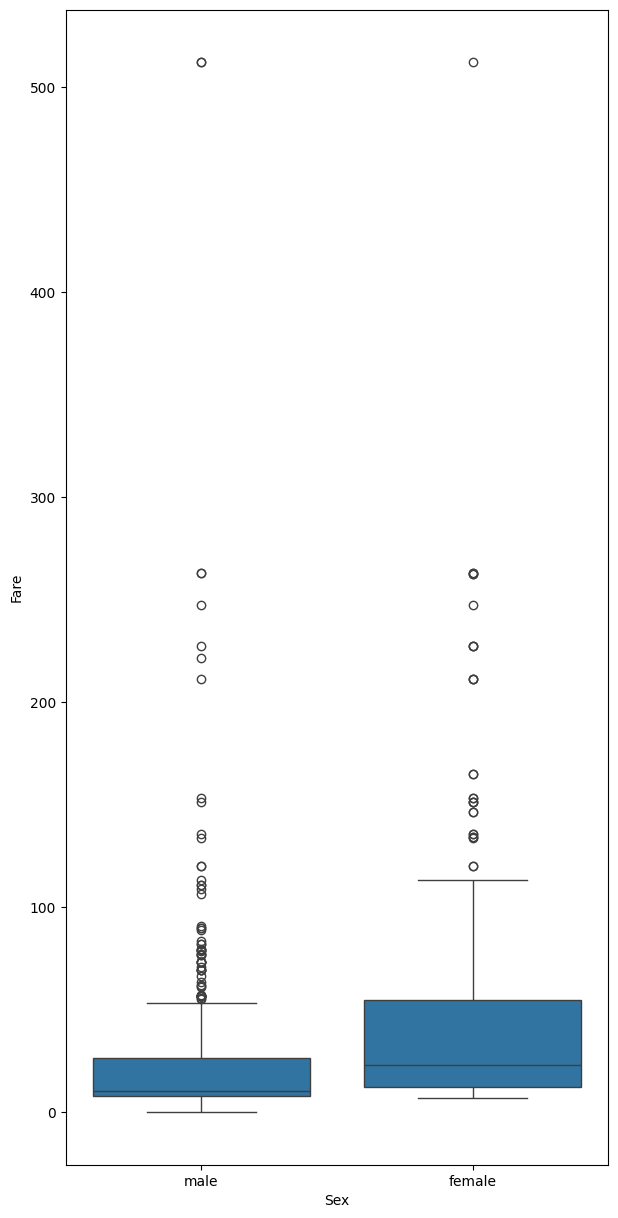

In [ ]:
plt.figure(figsize=(7,15))
sns.boxplot(data= data, x ='Sex', y= 'Fare',showfliers=True)
plt.show()

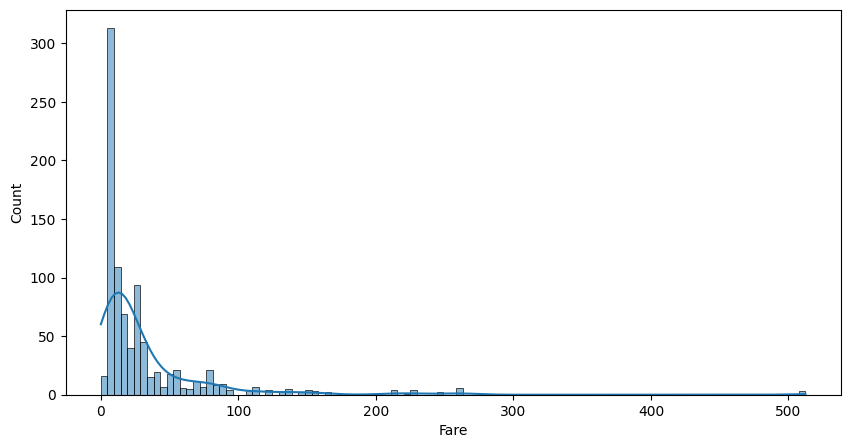

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='Fare', kde=True)
plt.show()

In [ ]:
richpeople = data.groupby('Pclass')['Survived'].sum()
print(survivors_by_class)